# Discussion - Homework 5

In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = "{:,.4f}".format

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

## This notebook is for illustrative purposes
#### You will not be able to run it, as it relies on modules, `factor_pricing.py`, `forecasts.py`

In [2]:
import sys
sys.path.insert(0, '../cmds')
from portfolio import *
from factor_pricing import *
from forecasts import *

## Load Data

In [3]:
filepath_data = '../data/factor_pricing_data.xlsx'
info = pd.read_excel(filepath_data,sheet_name='descriptions')
info.rename(columns={'Unnamed: 0':'Symbol'},inplace=True)
info.set_index('Symbol',inplace=True)

facs = pd.read_excel(filepath_data,sheet_name='factors (excess returns)')
facs.set_index('Date',inplace=True)

rf = pd.read_excel(filepath_data,sheet_name='risk-free rate')
rf.set_index('Date',inplace=True)

# 2. The Factors

## 2.1 and 2.2 Univariate Performance

In [4]:
performanceMetrics(facs,annualization=12)

,Mean,Vol,Sharpe,Min,Max
MKT,0.0831,0.1567,0.5305,-0.2324,0.1365
SMB,0.0122,0.1005,0.1211,-0.1535,0.1834
HML,0.0275,0.1088,0.2529,-0.1397,0.1275
RMW,0.0448,0.0834,0.5376,-0.1873,0.1309
CMA,0.0333,0.0715,0.4652,-0.0694,0.0905
UMD,0.0655,0.1545,0.4241,-0.3430,0.1820


In [5]:
performanceMetrics(facs['2015':],annualization=12)

,Mean,Vol,Sharpe,Min,Max
MKT,0.1069,0.1602,0.6676,-0.1339,0.1365
SMB,-0.0058,0.0977,-0.0590,-0.0831,0.0712
HML,-0.0197,0.1325,-0.1488,-0.1397,0.1275
RMW,0.0395,0.0712,0.5553,-0.0480,0.0722
CMA,0.0022,0.0796,0.0282,-0.0694,0.0771
UMD,0.0255,0.1368,0.1865,-0.1243,0.0998


## 2.3 Correlation

MIN Correlation pair is ('RMW', 'SMB')
MAX Correlation pair is ('HML', 'CMA')


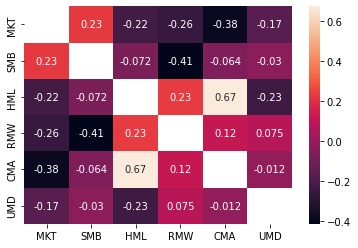

In [6]:
display_correlation(facs)

In [7]:
retsx = pd.read_excel(filepath_data,sheet_name='portfolios (excess returns)')
retsx.set_index('Date',inplace=True)

## 2.4 Tangency

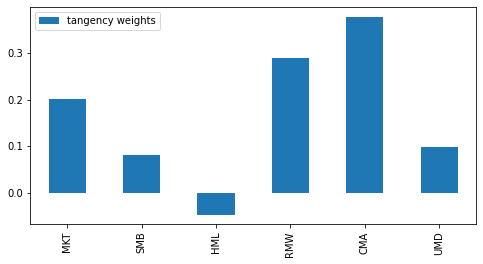

In [8]:
fig = plt.figure(figsize=(8,4))
ax1=fig.add_subplot(1,1,1)
tangency_weights(facs).plot.bar(ax=ax1);

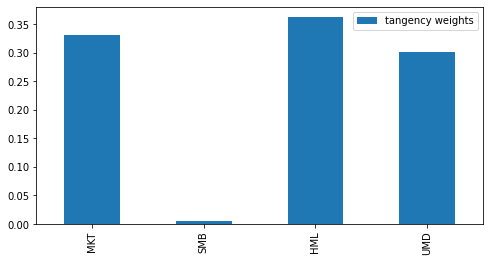

In [9]:
fig = plt.figure(figsize=(8,4))
ax1=fig.add_subplot(1,1,1)
tangency_weights(facs[['MKT','SMB','HML','UMD']]).plot.bar(ax=ax1);

# 3. Testing Modern Linear Pricing Models

## Models

In [10]:
models = dict()
models['CAPM'] = ['MKT']
models['FF3'] = ['MKT','SMB','HML']
models['AQR'] = ['MKT','HML','RMW','UMD']
models['FF5'] = ['MKT','SMB','HML','RMW','CMA']

## Testing Factor Pricing




CAPM: Factor Pricing



Time-Series Test Plots


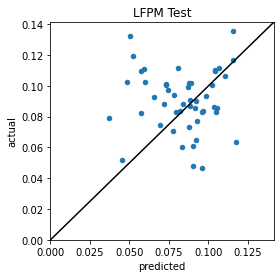

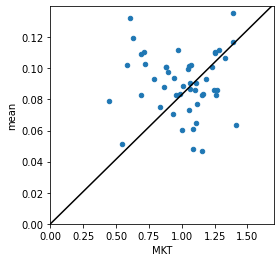

Cross-Sectional Test Plots


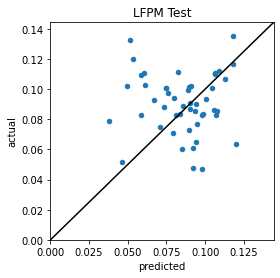

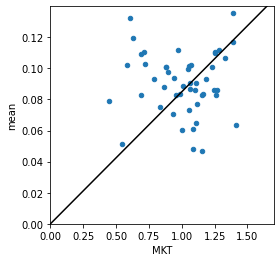


ESTIMATES


,premium-TS,premium-CS
MKT,0.0831,0.0849



MODEL FIT


,MAE-TS,MAE-CS
error,0.0215,0.0214



STATISTICAL SIGNIFICANCE


time-series,priced,premium
p-values,,
MKT,0.0006,0.0003
error,0.0000,NaN


"premium" p-value is the usual t-stat on the time-series factor mean.
"priced" p-value of factor is the t-stat of forming the tangency portfolio.
"priced" p-value of "error" is the joint-chi-squared test of the time-series alphas



FF3: Factor Pricing



Time-Series Test Plots


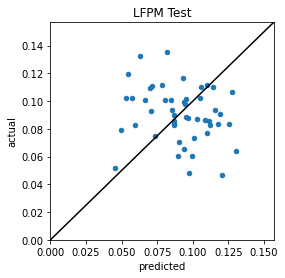

Cross-Sectional Test Plots


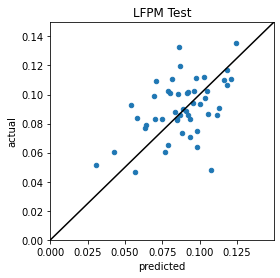


ESTIMATES


,premium-TS,premium-CS
MKT,0.0831,0.1010
SMB,0.0122,-0.0659
HML,0.0275,-0.0173



MODEL FIT


,MAE-TS,MAE-CS
error,0.0254,0.0161



STATISTICAL SIGNIFICANCE


time-series,priced,premium
p-values,,
MKT,0.0002,0.0003
SMB,0.9501,0.2147
HML,0.0146,0.0496
error,0.0000,NaN


"premium" p-value is the usual t-stat on the time-series factor mean.
"priced" p-value of factor is the t-stat of forming the tangency portfolio.
"priced" p-value of "error" is the joint-chi-squared test of the time-series alphas



AQR: Factor Pricing



Time-Series Test Plots


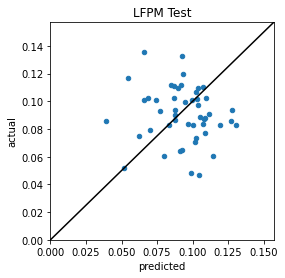

Cross-Sectional Test Plots


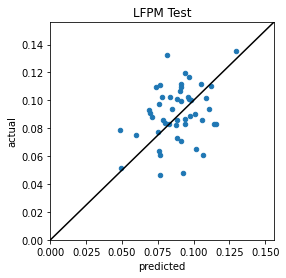


ESTIMATES


,premium-TS,premium-CS
MKT,0.0831,0.0866
HML,0.0275,-0.0409
RMW,0.0448,0.0455
UMD,0.0655,0.0553



MODEL FIT


,MAE-TS,MAE-CS
error,0.0235,0.0172



STATISTICAL SIGNIFICANCE


time-series,priced,premium
p-values,,
MKT,0.0000,0.0003
HML,0.0086,0.0496
RMW,0.0003,0.0002
UMD,0.0002,0.0029
error,0.0000,NaN


"premium" p-value is the usual t-stat on the time-series factor mean.
"priced" p-value of factor is the t-stat of forming the tangency portfolio.
"priced" p-value of "error" is the joint-chi-squared test of the time-series alphas



FF5: Factor Pricing



Time-Series Test Plots


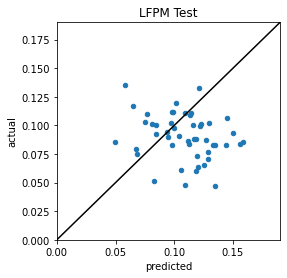

Cross-Sectional Test Plots


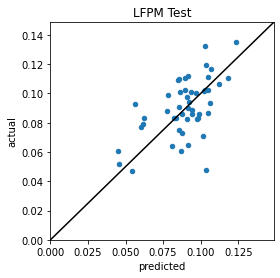


ESTIMATES


,premium-TS,premium-CS
MKT,0.0831,0.0948
SMB,0.0122,-0.0587
HML,0.0275,-0.0354
RMW,0.0448,0.0368
CMA,0.0333,-0.0154



MODEL FIT


,MAE-TS,MAE-CS
error,0.0325,0.0136



STATISTICAL SIGNIFICANCE


time-series,priced,premium
p-values,,
MKT,0.0000,0.0003
SMB,0.0941,0.2147
HML,0.0740,0.0496
RMW,0.0000,0.0002
CMA,0.0000,0.0012
error,0.0000,NaN


"premium" p-value is the usual t-stat on the time-series factor mean.
"priced" p-value of factor is the t-stat of forming the tangency portfolio.
"priced" p-value of "error" is the joint-chi-squared test of the time-series alphas


In [11]:
for model in models.keys():
    print(f'\n\n\n======================================================')
    print(f'{model}: Factor Pricing')
    print(f'======================================================\n\n\n')
    LFPtests(retsx,facs[models[model]],useIntCS=False,annualization=12)

## Comparing Models

In [12]:
mae = pd.DataFrame(columns=models.keys())
mae.index.name = 'MAE'

r2means = pd.DataFrame(columns=models.keys())
r2means.index.name = 'R-squared Means'

for model in models.keys():
    output = LFPts(retsx,facs[models[model]],annualization=12)
    mae.loc['Time-Series',model] = output['stats']['alpha'].mad()
    mae.loc['Cross-Section',model] = LFPcs(output['betas'],output['stats']['mean'],useInt=False)['errors'].mad()

    r2means.loc['Time-Series',model] = output['stats']['rsquared'].mean()
mae

,CAPM,FF3,AQR,FF5
MAE,,,,
Time-Series,0.0212,0.0253,0.0236,0.0298
Cross-Section,0.0215,0.0162,0.0169,0.0136


## Linear Factor Decompositions

We see that the time-series r-squared metrics of the assets average below 60% in all models. 

Notably, they do not increase much with the addition of factors beyond MKT.

Thus, while MKT is likely useful in an LFD of these assets, the other factors would not be very useful.

In [13]:
r2means

,CAPM,FF3,AQR,FF5
R-squared Means,,,,
Time-Series,0.5275,0.5711,0.5757,0.5964


# 4. Extensions

## 4.1 Cross-sectional Estimation
See above.
As expected, the cross-sectional estimation delivers lower MAE due to having extra flexibility in choosing the factor premia.

Even without including an intercept in the CS regression, we find that the factor premia differ substantially from the time-series averages of the factors in many cases. 

* MKT and RMW are similar to the time-series estimate. 

* SMB, HML, CMA all become negative in the CS estimation! This flexibility is what decreases the MAE substantially. 

* UMD is much lower in the CS estimation, though still positive.

## 4.2 Using LFP Models

In [14]:
window = 60
forecast = LFPfit_rolling(retsx,facs[models['AQR']],window=window).shift()
null = retsx.expanding(min_periods=window).mean().shift()

r2oos = oos_rsquared(retsx,forecast,null=null)
r2oos.describe()

count   49.0000
mean    -0.0025
std      0.0062
min     -0.0260
25%     -0.0055
50%     -0.0018
75%      0.0008
max      0.0130
dtype: float64

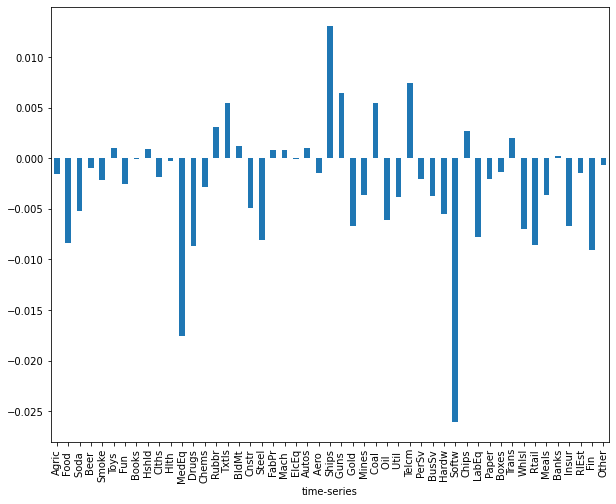

In [15]:
r2oos.plot.bar(figsize=(10,8));

### 4.2b

The model does a poor job of forecasting returns as seen by the moslty negative OOS r-squared. The OOS r-squared are all very close to 0.

In [16]:
print(f'\nMAX forecasting power for {r2oos.idxmax()}: {r2oos.max():0.2f}')
print(f'MIN forecasting power for {r2oos.idxmin()}: {r2oos.min():0.2f}\n')


MAX forecasting power for Ships: 0.01
MIN forecasting power for Softw: -0.03



### 4.3c

In [17]:
window_choices = [36,60,96]
R2oosWindows = pd.DataFrame(columns=window_choices)

for window in window_choices:
    null = retsx.expanding(min_periods=window).mean().shift()
    forecast = LFPfit_rolling(retsx,facs[models['AQR']],window=window).shift()
    r2oos = oos_rsquared(retsx,forecast,null=null)
    R2oosWindows[window] = r2oos.describe()

R2oosWindows

,36,60,96
count,49.0000,49.0000,49.0000
mean,-0.0014,-0.0025,-0.0017
std,0.0053,0.0062,0.0060
min,-0.0145,-0.0260,-0.0235
25%,-0.0044,-0.0055,-0.0039
50%,-0.0008,-0.0018,-0.0006
75%,0.0017,0.0008,0.0012
max,0.0098,0.0130,0.0097


### 4.2d

In [18]:
window = 60
null = retsx.expanding(min_periods=window).mean().shift()

R2oosModels = pd.DataFrame(columns=models.keys())
for model in models.keys():
    forecast = LFPfit_rolling(retsx,facs[models[model]],window=window).shift()
    r2oos = oos_rsquared(retsx,forecast,null=null)
    R2oosModels[model] = r2oos.describe()

R2oosModels

,CAPM,FF3,AQR,FF5
count,49.0000,49.0000,49.0000,49.0000
mean,0.0004,0.0000,-0.0025,-0.0029
std,0.0039,0.0048,0.0062,0.0071
min,-0.0099,-0.0177,-0.0260,-0.0205
25%,-0.0012,-0.0020,-0.0055,-0.0071
50%,0.0009,0.0006,-0.0018,-0.0022
75%,0.0028,0.0026,0.0008,0.0019
max,0.0062,0.0091,0.0130,0.0119


### Results

We see that the forecasting power is not good for any of the three windows.

Furthermore, it is not strong for any of the models, though the CAPM performs best!

Note that this does not prove these models do not work, but it illustrates that they do not work well for these assets, at least when using their time-series-estimated premia.